### 7.1  
Determine and plot the true posterior and the Laplace approximate

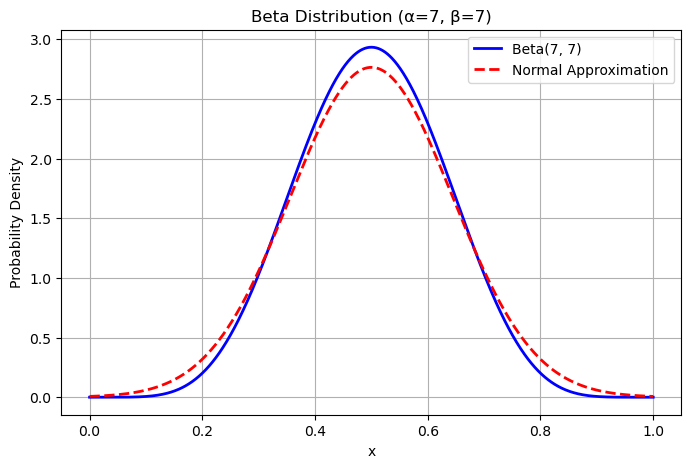

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, norm

def plot_beta_vs_laplace(alpha, beta_param):

    # Check for valid parameters
    if alpha <= 0 or beta_param <= 0:
        raise ValueError("Alpha and Beta parameters must be greater than 0")
    
    # Create a range of x values between 0 and 1
    x = np.linspace(0, 1, 1000)
    
    # Compute the beta PDF
    y = beta.pdf(x, alpha, beta_param)
    mu = (alpha - 1)/(alpha + beta_param - 2)
    std = ((alpha - 1)*(beta_param - 1))/((alpha + beta_param - 2)**3)
    
    # Plot the distribution
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, 'b-', lw=2, label=f'Beta({alpha}, {beta_param})')
    plt.plot(x, norm.pdf(x,mu,np.sqrt(std)), 
             'r--', lw=2, label='Normal Approximation')
    plt.title(f'Beta Distribution (α={alpha}, β={beta_param})')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_beta_vs_laplace(7,7)

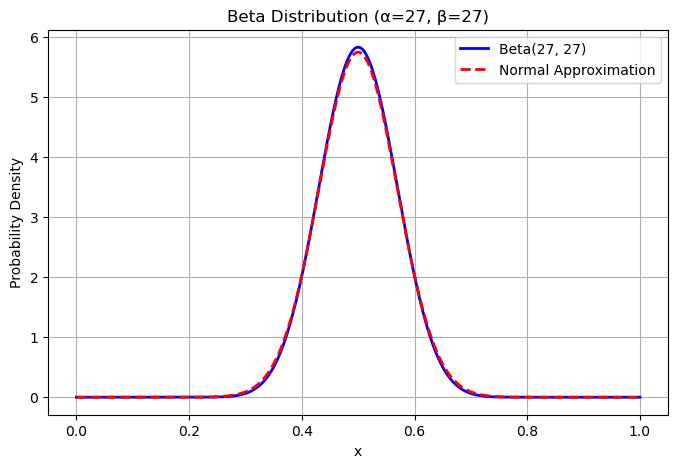

In [16]:
plot_beta_vs_laplace(27,27)

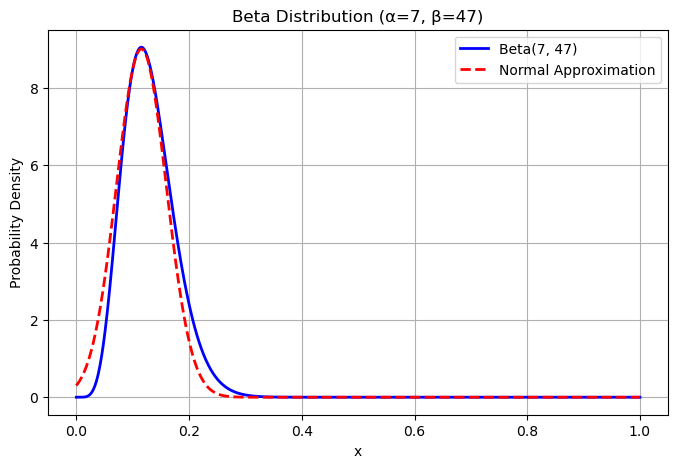

In [17]:
plot_beta_vs_laplace(7,47)

### 7.2

(54,)


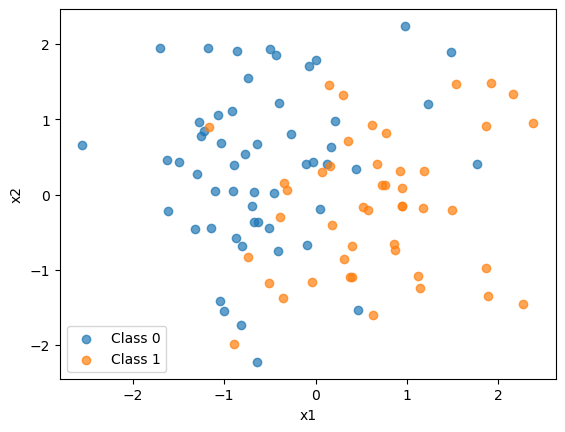

In [31]:
np. random .seed (0)
X = np.random.randn (100 , 2)
#print(X)
true_th = np.array([2.0 , -1.0])
probs = 1 / (1 + np.exp (-(X @ true_th )))
#print(probs)
y = np.random.binomial(1, probs)
#print(y)
print(X[y==0][:, 0].shape)
print
plt. figure ()
plt. scatter (X[y==0][: , 0],X[y==0][: , 1], label ="Class 0",alpha =0.7)
plt. scatter (X[y==1][: , 0],X[y==1][: , 1], label ="Class 1",alpha =0.7)
plt. xlabel ("x1")
plt. ylabel ("x2")
plt. legend ()
plt.show ()

[[-1.         -4.        ]
 [-0.93939394 -4.        ]
 [-0.87878788 -4.        ]
 ...
 [ 4.87878788  2.        ]
 [ 4.93939394  2.        ]
 [ 5.          2.        ]]
[-160.25209645 -158.04145045 -155.86216161 ... -105.93232689 -106.34338144
 -106.76074178]


TypeError: Input z must be 2D, not 1D

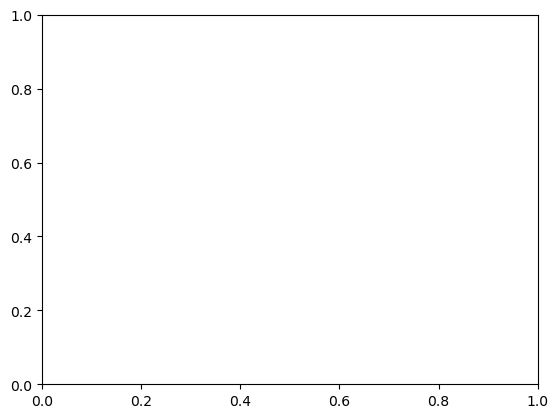

In [37]:
th0 = np. linspace ( -1 ,5 ,100)
th1 = np. linspace ( -4 ,2 ,100)
X0 , X1 = np. meshgrid (th0 ,th1)
grid = np. column_stack ([ X0. ravel () , X1. ravel () ])
print(grid)
m0 = np.array ([0.0 , 0.0])
S0 = np.diag ([10,10])
def get_post(th,X,y,m0,S0):
    probs = 1/(1+ np.exp(-X @ th))
    log_prior = -0.5 * ((true_th - m0) @ np.linalg.inv (S0) @ (true_th - m0))
    log_likeilhood = np.sum(y * np.log(probs) + (1 - y) * np.log(1 - probs))
    return log_prior + log_likeilhood
post = np.array([get_post(th, X, y, m0, S0) for th in grid])
psot = post.reshape(X0.shape)
print(post)

plt. contour (X0 ,X1 , post , levels =20)
#plt.plot(X0[ ii_map ],X1[ ii_map ],"ro ",label =’MAP ’)
plt. xlabel ("th_1")
plt. ylabel ("th_2")
plt. legend ()
plt.show ()